In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import r_regression
import seaborn as sns
fileloc = './mtcars.csv'

In [2]:
mtcars = pd.read_csv(fileloc)
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#    Manager's Model

In [3]:
results = smf.ols('mpg ~ wt + cyl + vs', data = mtcars).fit()
#print()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     45.85
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           6.24e-11
Time:                        22:59:40   Log-Likelihood:                -73.946
No. Observations:                  32   AIC:                             155.9
Df Residuals:                      28   BIC:                             161.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.7461      3.399     11.399      0.0

# Goal?

- Higher R-Squared value

- More features with lesser P>|t| values

- No multi-collinearity

# Domain Knowledge: 

The knowledge of the product/ industry greatly enhances the decision making process in picking the right features for the model. Domain knowledge helps in understading the data better as a part of Feature Engineering and Data Pre-processing and yields high precision results. Even before running the ML models, with enough product expertise, must be able to figure out the relationships between the independent and the dependent variables. Domain Knowledge also throws light on the type of data in the data set like continuous or categorical, min and max of the features,etc.


[1]	mpg	Miles/(US) gallon

[2]	cyl	Number of cylinders

[3]	disp	Displacement (cu.in.)

[4]	hp	Gross horsepower

[5]	drat	Rear axle ratio

[6]	wt	Weight of engine (1000 lbs)

[7]	qsec	1/4 mile time

[8]	vs	Engine (0 = V-shaped, 1 = straight)

[9]	am	Transmission (0 = automatic, 1 = manual)

[10] gear	Number of forward gears

[11] carb	Number of carburetors

In the above list of the features in our MTCARS Dataset, the 'wt' of the engine increases as the number of cylinders 'cyl' increase, so they have high correlation. So by dividing wt/cyl , we are trying to undertsnd the effect of this ratio on the 'mpg'.  But we also know higher 'wt' can lead to lower 'mpg'. Also we understand that 'vs' and 'am' are binary data. 


# PCA:

In [4]:
mtcars = pd.read_csv(fileloc)
#mtcars.head()

In [5]:
mtcarsX=mtcars.drop(['model','mpg'],axis=1)
#mtcarsX.head()

In [6]:
pca = PCA(n_components=5)             # Initialize pca object to create 2 PCs
pcs = pca.fit_transform(mtcarsX)

In [7]:
principal_mtcarsDf = pd.DataFrame(data = pcs
             , columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5'])

In [8]:
principal_mtcarsDf.shape

(32, 5)

In [9]:
pcs_Components_df = pd.DataFrame(pca.components_.transpose(), columns=['PC1','PC2', 'PC3','PC4', 'PC5'],index=['wt','cyl','disp', 'hp','drat','qsec','vs','am','gear','carb'])

print('Variable Weights for each PC')
pcs_Components_df

Variable Weights for each PC


,PC1,PC2,PC3,PC4,PC5
wt,0.012043,0.003374,-0.197386,0.045673,0.794562
cyl,0.900235,-0.435049,-0.006952,0.003278,-0.014249
disp,0.435074,0.899511,0.033211,-0.021518,0.000733
hp,-0.002661,0.003902,-0.069805,0.023723,-0.289140
drat,0.006243,-0.004864,0.161609,0.320660,0.099932
qsec,-0.006677,-0.025019,0.901614,0.183819,0.033432
vs,-0.002731,-0.002199,0.171546,-0.031256,-0.106447
am,-0.001963,0.005796,-0.153197,-0.040176,-0.253774
gear,-0.002606,0.011275,-0.142631,0.119640,-0.443963
carb,0.005768,0.027777,-0.206758,0.918347,-0.030451


Here, we get weightage of the features for each PC.

-------------------------
For PC1:

hp, qsec, vs, am, gear (-)

wt, cyl, disp carb (+)

--------------------------

For PC2:

cyl, drat, qsec, vs (-)

wt, disp, carb (+)

--------------------------

For PC3:

wt, cyl, hp, am, gear, carb (-)

drat, disp, vs, qsec (+)

In [10]:
pcs_Summary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                            'Proportion of variance': pca.explained_variance_ratio_,
                            'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
                           })
pcs_Summary = pcs_Summary.transpose()
pcs_Summary.columns = ['PC{}'.format(i) for i in range(1, len(pcs_Summary.columns) + 1)]
pcs_Summary.round(4)

print('PCA Summary')
pcs_Summary

PCA Summary


,PC1,PC2,PC3,PC4,PC5
Standard deviation,136.433870,38.146476,1.315422,0.965528,0.767895
Proportion of variance,0.927328,0.072493,0.000086,0.000046,0.000029
Cumulative proportion,0.927328,0.999821,0.999907,0.999954,0.999983


In [11]:
resultsNewPC3 = smf.ols('mpg ~  wt/cyl+qsec+am+carb', data = mtcars).fit() #took variables with higher weights from PC3
print()
print(resultsNewPC3.summary())

#'mpg ~  qsec + wt*vs/cyl +drat+am' - 88.2
#'mpg ~  qsec + wt*vs/cyl+hp +drat+am' - 89
#mpg ~  wt*vs/cyl+qsec+am+carb' - 87.9


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     31.81
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           2.73e-10
Time:                        22:59:40   Log-Likelihood:                -70.977
No. Observations:                  32   AIC:                             154.0
Df Residuals:                      26   BIC:                             162.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5778      9.708      0.884      0.

In [12]:
resultsNewPC2 = smf.ols('mpg ~  wt/cyl+disp +qsec+am', data = mtcars).fit() #took variables with higher weights from PC2
print()
print(resultsNewPC2.summary())

#mpg ~  disp+wt*vs/cyl+qsec+am*gear -88.9
#mpg ~  wt/cyl+disp +qsec+am' - 85.8


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     30.88
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           3.78e-10
Time:                        22:59:40   Log-Likelihood:                -71.385
No. Observations:                  32   AIC:                             154.8
Df Residuals:                      26   BIC:                             163.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2150      8.806      0.479      0.

In [13]:
resultsNewPC1 = smf.ols('mpg ~  cyl +disp+wt', data = mtcars).fit() #took variables with higher weights from PC1
print()
print(resultsNewPC1.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     46.42
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           5.40e-11
Time:                        22:59:40   Log-Likelihood:                -73.779
No. Observations:                  32   AIC:                             155.6
Df Residuals:                      28   BIC:                             161.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.1077      2.842     14.462      0.

### Using PCA Components in OLS Regression

The Principal Components are obtained in the order of their impact on variance. So the hypothesis is that the features which have higher impact on PC1 will have higher relation with the output. But from the abve experiment PCA Analysis, we got: 

PC1 - marginal improvement from Manager's Model but high Multi-collinearity.

PC2 - 1.8 more than Manager's Model but high Multi-collinearity.

PC3 - 2.8 more than Manager's Model.

# Correlation

In [14]:
mtcars = pd.read_csv(fileloc)
#mtcars.head()

In [15]:
mtcarsY=mtcars.loc[:,'mpg']
#mtcarsY.head()

In [16]:
correl = r_regression(mtcarsX,mtcarsY)
correl = correl.reshape(1,10)
correl.shape

(1, 10)

In [17]:
mtcarsX.columns

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

In [18]:
mtcarsX.head(0)

CorrelationDF = pd.DataFrame(data=correl)
CorrelationDF.columns = mtcarsX.columns

In [19]:
CorrelationDF

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925


In [20]:
resultsCor = smf.ols('mpg ~  wt+disp+cyl+hp+drat', data = mtcars).fit()
print()
print(resultsCor.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     29.77
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           5.62e-10
Time:                        22:59:41   Log-Likelihood:                -71.883
No. Observations:                  32   AIC:                             155.8
Df Residuals:                      26   BIC:                             164.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0084      7.571      4.756      0.

### Using Correlation in OLS Regression

The Correlation matrix gives the Correlation between the dependent variable and the individual independent variables. Here we see that 'wt' clearly has the highest correlation with 'mpg' followed by disp ,cyl , hp and drat. When these features are fitted in the model, the R-Squared increased from 83.1 to 85.1 but the multi-collinearity between the features in too high (Condition Number).

# Multi-collinearity:

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = mtcarsX.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(mtcarsX.values, i)
                          for i in range(len(mtcarsX.columns))]
  
print(vif_data)

  feature         VIF
0     cyl  112.629828
1    disp   98.930791
2      hp   56.047781
3    drat  132.214353
4      wt  182.948049
5    qsec  317.534376
6      vs    8.752581
7      am    7.412020
8    gear  119.804879
9    carb   32.213836


In [22]:
resultsVIF = smf.ols('mpg ~  wt*vs/cyl+qsec+am+carb', data = mtcars).fit()
print()
print(resultsVIF.summary())
#'mpg ~  wt*vs/cyl+qsec+am+carb' - 87.9 with no multicollienearity


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     24.83
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.59e-09
Time:                        22:59:41   Log-Likelihood:                -68.630
No. Observations:                  32   AIC:                             153.3
Df Residuals:                      24   BIC:                             165.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3669      9.615      0.766      0.

### Understanding Multi-Collinearity in OLS Regression

To understand the multi-collinearity between the independent features, we introduce the VIF (Variance Inflation Factor) that tells the correlation of each feature with every other feature in the data set. Here we observe that 'vs', 'am' and 'carb' have low multi-collinearity these features were additionally fitted into the model to improve the R-Squared while the primary goal is to reduce the multi-collinearity (Condition Number). Here using Multi-collinearity concept, we could improve the R-squared to 0.879 from initial 0.831.

# Standardization:

In [23]:
mtcarsZ=mtcars.drop(['model'],axis=1)
#mtcarsZ.head()

In [24]:
mtcarsY=mtcars.loc[:,'mpg']
#mtcarsY.head()

In [25]:
mtcarsStd= StandardScaler()
mtcarsStd.fit(mtcarsZ)
mtcarsScaled = mtcarsStd.transform(mtcarsZ)
columns_names=mtcarsZ.columns
mtcarsScaled =pd.DataFrame(mtcarsScaled,columns=columns_names)
#mtcarsScaled

In [26]:
resultsStd = smf.ols('mpg ~  wt*vs/cyl+qsec+am+carb', data = mtcarsScaled).fit()
#results = smf.ols('mpg ~ wt + cyl', data = mtcarsX).fit()
print()
print(resultsStd.summary())

#'mpg ~  qsec + wt*vs/cyl+hp +drat+am' - 89.2 no mc and small cond num
#mpg ~  wt*vs/cyl+qsec+am+carb - 88.6 no mc, more variables with lesser P>t and small cond num


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     26.53
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           8.03e-10
Time:                        22:59:41   Log-Likelihood:                -10.722
No. Observations:                  32   AIC:                             37.44
Df Residuals:                      24   BIC:                             49.17
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1708      0.098     -1.739      0.

### Standardization of data set in OLS Regression

Standardization of the dataset can help us in achieving higher performace and accuracy of the model. So here, all the features of the data set have been standardized as they have values in different ranges. Here the same features (mpg ~  wt*vs/cyl+ qsec+ am+ carb) as in the Multi-collinearity (VIF) model have been used  but this time, the data set fitted in the model has been standardized. This change alone has increased the efficiency with new R-Square to be 0.886. 

#### If the features are slightly changed to 'mpg ~  qsec + wt*vs/cyl+hp +drat+am' , R Squared is  89.2 with NO Multi-collinearity  and small condition number. 

#### However, 'mpg ~  wt*vs/cyl+qsec+am+carb' can be a better model although slightly lesses R Squared is  88.6 with NO Multi-collinearity  and small condition number, it has MORE FEATURES with lesser P>|t| values. 

# Final Model

In [27]:
resultsFinal = smf.ols('mpg ~  wt*vs/cyl+qsec+am+carb', data = mtcars).fit() #fitting the final model to the pre-standardized data set
print()
print(resultsFinal.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     24.83
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.59e-09
Time:                        22:59:41   Log-Likelihood:                -68.630
No. Observations:                  32   AIC:                             153.3
Df Residuals:                      24   BIC:                             165.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3669      9.615      0.766      0.

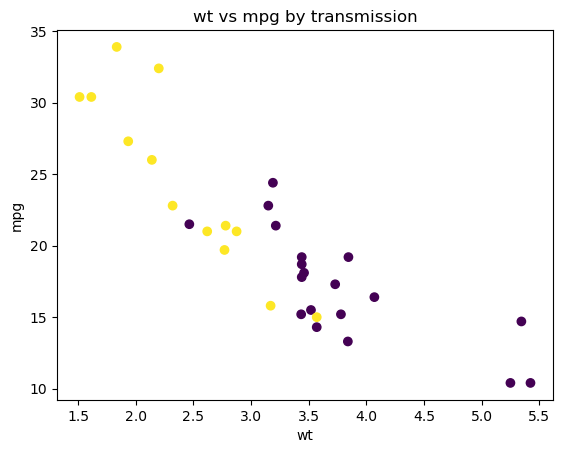

In [28]:
## Visualizations ##

## matplotlib ##
import matplotlib.pyplot as plt

# Scatter Plots #
plt.scatter(x=mtcars.wt, y=mtcars.mpg, c=mtcars.am)
plt.title('wt vs mpg by transmission')
plt.xlabel('wt')
plt.ylabel('mpg')
plt.savefig('./mpgvswt.png')
plt.show()

In [29]:
sns.set(style="ticks")

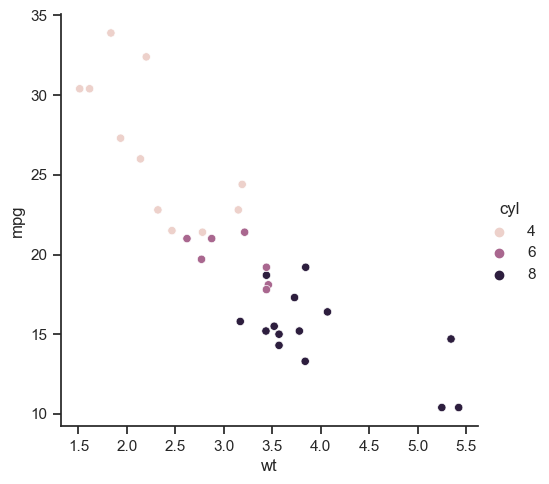

In [30]:
# wt vs mpg by cyl
sns.relplot(x='wt', y='mpg', hue='cyl', data=mtcars, legend='full')

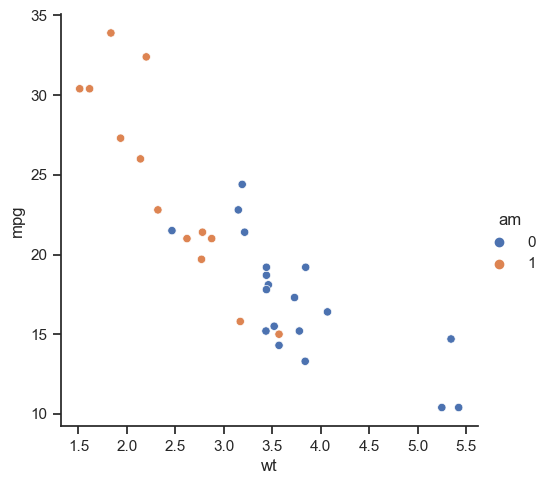

In [31]:
# wt vs mpg by am (transmission)
sns.relplot(x='wt', y='mpg', hue='am', data=mtcars, legend='full')

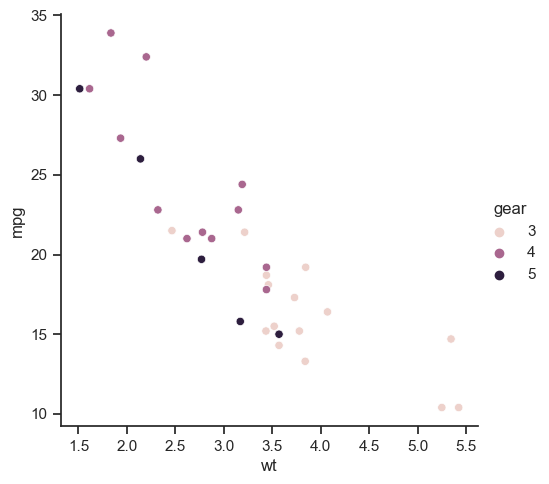

In [32]:
# wt vs mpg by gear
sns.relplot(x='wt', y='mpg', hue='gear', data=mtcars, legend='full')

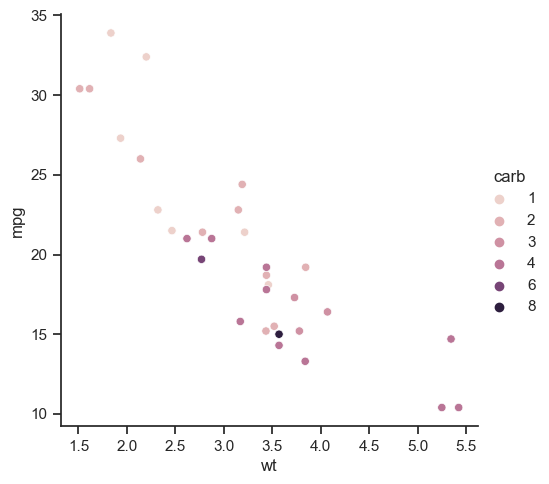

In [33]:
# wt vs mpg by carb
sns.relplot(x='wt', y='mpg', hue='carb', data=mtcars, legend='full')

# How to take next level Business decisions ?

### Business Requirements:
    
    -To maximize the mpg (miles per gallon)
   
### Steps: 

    - A dataframe is created with independent variables that we chose from the above OLS model by applying the concepts of PCA, Domain Knowledge, Correlation, Multi-collinearity , Standardization and are given a range values. (for-loop)
    - We then predict the 'mpg' array for all the combination rows.
    - Filter the top 10 mpg valued rows to understand the other feature specifications 
    

In [34]:
Specification_Data = pd.DataFrame(np.zeros((240,11)),columns=mtcarsZ.columns.to_list())
#Specification_Data

In [35]:
Specification_DataSet = Specification_Data.drop('mpg', axis=1)
#Specification_DataSet

### 'mpg ~  wt*vs/cyl+qsec+am+carb'

In [36]:

i = 0
for cyl in [2,4,6]:
    for qsec in range(14,24,3):
        for wt in np.linspace(1.500,2.500,10,True):
            for carb in [1,2]:
                Specification_DataSet.iloc[i]['cyl'] = cyl #Scatterplot reference
                Specification_DataSet.iloc[i]['qsec'] = qsec
                Specification_DataSet.iloc[i]['wt'] = wt
                Specification_DataSet.iloc[i]['carb'] = carb # 1 or 2 ideal for higher 'mpg' from scatterplot visualization
                Specification_DataSet.iloc[i]['vs'] = 1
                Specification_DataSet.iloc[i]['am'] = 1 #manual(am=1) has higher mpg ( from the visualization scatterplot 'wt vs mpg by am' )
                Specification_DataSet.iloc[i]['gear'] = 4 #Value can be 3, 4 or 5 gears.  This value doesnt have an effect on the model prediction
                Specification_DataSet.iloc[i]['disp'] = 100 #chose random value within the range for the 'disp' of mtcars dataset. This value doesnt have an effect on the model prediction
                Specification_DataSet.iloc[i]['hp'] = 90 #given the median of the 'hp' of top ten 'mpg' brands from mtcars dataset.This value doesnt have an effect on the model prediction
                Specification_DataSet.iloc[i]['drat'] = 3.700 #given the median of the 'drat' of mtcars dataset.This value doesnt have an effect on the model prediction
                i = i +1
            

In [37]:
Specification_DataSet

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,2.0,100.0,90.0,3.7,1.500000,14.0,1.0,1.0,4.0,1.0
1,2.0,100.0,90.0,3.7,1.500000,14.0,1.0,1.0,4.0,2.0
2,2.0,100.0,90.0,3.7,1.611111,14.0,1.0,1.0,4.0,1.0
3,2.0,100.0,90.0,3.7,1.611111,14.0,1.0,1.0,4.0,2.0
4,2.0,100.0,90.0,3.7,1.722222,14.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...
235,6.0,100.0,90.0,3.7,2.277778,23.0,1.0,1.0,4.0,2.0
236,6.0,100.0,90.0,3.7,2.388889,23.0,1.0,1.0,4.0,1.0
237,6.0,100.0,90.0,3.7,2.388889,23.0,1.0,1.0,4.0,2.0
238,6.0,100.0,90.0,3.7,2.500000,23.0,1.0,1.0,4.0,1.0


In [38]:
YPred=resultsFinal.predict(Specification_DataSet) #Predicted Y on test data
#YPred

In [39]:
Specification_DataSet['mpg'] =YPred
Specification_DataSet # Printing the table with predicted 'mpg' values along with the values of the picked features from the OLS model.

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg
0,2.0,100.0,90.0,3.7,1.500000,14.0,1.0,1.0,4.0,1.0,25.255242
1,2.0,100.0,90.0,3.7,1.500000,14.0,1.0,1.0,4.0,2.0,25.098783
2,2.0,100.0,90.0,3.7,1.611111,14.0,1.0,1.0,4.0,1.0,24.480694
3,2.0,100.0,90.0,3.7,1.611111,14.0,1.0,1.0,4.0,2.0,24.324235
4,2.0,100.0,90.0,3.7,1.722222,14.0,1.0,1.0,4.0,1.0,23.706146
...,...,...,...,...,...,...,...,...,...,...,...
235,6.0,100.0,90.0,3.7,2.277778,23.0,1.0,1.0,4.0,2.0,33.190995
236,6.0,100.0,90.0,3.7,2.388889,23.0,1.0,1.0,4.0,1.0,32.675659
237,6.0,100.0,90.0,3.7,2.388889,23.0,1.0,1.0,4.0,2.0,32.519200
238,6.0,100.0,90.0,3.7,2.500000,23.0,1.0,1.0,4.0,1.0,32.003864


In [40]:
YPred.describe()  

count    240.000000
mean      28.320130
std        4.803709
min       18.127854
25%       24.497033
50%       28.294126
75%       32.091219
max       38.050020
dtype: float64

### Understanding the descriptive statistics of the predicted 'mpg' values.

-The predicted model (YPred) shows that 25% of the mpg values are higher than 32 miles/gallon.

-The median of the mpg values (YPred) is 28.3 while the actual mtcars data set has a median 'mpg' value of 19.2 miles/gallon.


In [41]:
Specification_DataSet.nlargest(n=10, columns=['mpg'],keep='first') #printing the top 10 largest mpg values along with different combinations of the features. 

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg
220,6.0,100.0,90.0,3.7,1.500000,23.0,1.0,1.0,4.0,1.0,38.050020
221,6.0,100.0,90.0,3.7,1.500000,23.0,1.0,1.0,4.0,2.0,37.893561
222,6.0,100.0,90.0,3.7,1.611111,23.0,1.0,1.0,4.0,1.0,37.378225
140,4.0,100.0,90.0,3.7,1.500000,23.0,1.0,1.0,4.0,1.0,37.356440
223,6.0,100.0,90.0,3.7,1.611111,23.0,1.0,1.0,4.0,2.0,37.221766
141,4.0,100.0,90.0,3.7,1.500000,23.0,1.0,1.0,4.0,2.0,37.199982
224,6.0,100.0,90.0,3.7,1.722222,23.0,1.0,1.0,4.0,1.0,36.706430
60,2.0,100.0,90.0,3.7,1.500000,23.0,1.0,1.0,4.0,1.0,36.662860
142,4.0,100.0,90.0,3.7,1.611111,23.0,1.0,1.0,4.0,1.0,36.633269
225,6.0,100.0,90.0,3.7,1.722222,23.0,1.0,1.0,4.0,2.0,36.549971


# Competetion Brands with similar Product Specifications: 

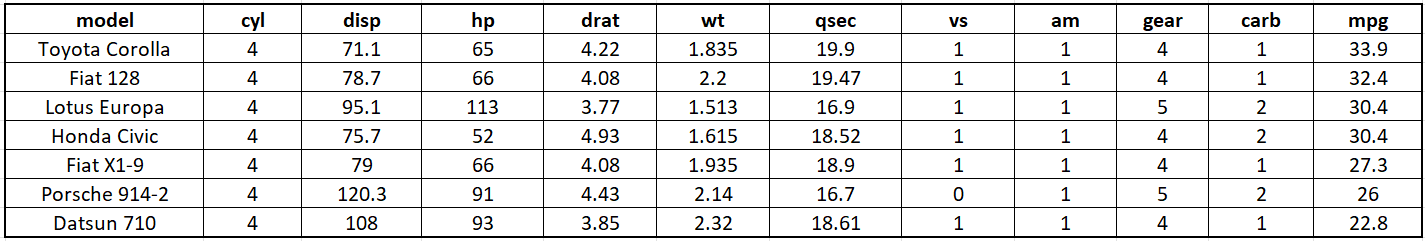

# Conclusion:

- Finally, this data can be compared with our original mtcars data set to understand which model is close to the competetion.
    - This process might also help us in making other business related decisions such as pricing, marketing, staying competetive in the market, etc. 